<a href="https://colab.research.google.com/github/jrbobes/jrbobes-hitl-ml/blob/master/POC_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

POC of SHAP (SHapley Additive exPlanations).

Author: jrbobes

Based on: https://pub.towardsai.net/how-to-explain-your-machine-learning-predictions-with-shap-values-a8332c3e5a11

In [3]:
!pip install shap

     |████████████████████████████████| 371 kB 8.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509232 sha256=1544593c44b83e279b49d2a09fb29df638c3cbf42a08c3275eea6db4b157ba6c
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [4]:
# load libraries
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Load dataset

In [5]:
# load dataset
diabetes = fetch_california_housing()
X = pd.DataFrame(data=diabetes['data'], columns=diabetes['feature_names'])
y = diabetes['target']

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datas

Split dataset and generate model

In [6]:

# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Build the model with the random forest regression algorithm
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

Explain the model's predictions using SHAP

In [7]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

Show the Forze plot.

In [14]:
# load JS visualization code to notebook
shap.initjs()
# visualize the first prediction’s explanation
shap.force_plot(explainer.expected_value, shap_values[2,:], X.iloc[2,:])

In [11]:
# load JS visualization code to notebook
shap.initjs()
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X)

Summary plot will give us the variable importance plot. Features with high predicting power are shown at the top and the ones with low predicting powers are shown at the bottom.

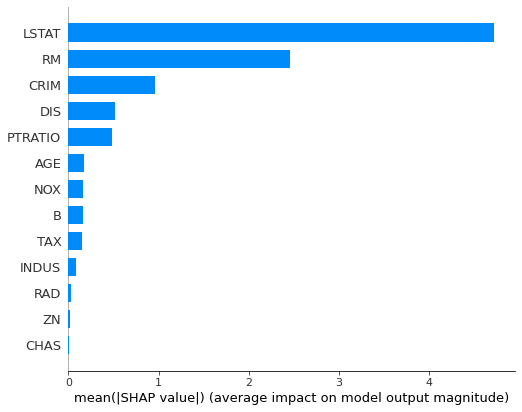

In [12]:
shap.summary_plot(shap_values, X_train, plot_type='bar')